#PGWAVE monthly file
This reads a PGWAVE-generated list of seeds, makes plots, then saves a csv file


In [1]:
%matplotlib inline
month=10
os.chdir(os.path.expandvars('$FERMI/skymodels/P301_monthly/month%02d'%month))
pgw_filename='ft1_TBIN_%d_map.txt' % (month-1)

In [2]:
t = pd.read_csv(pgw_filename, sep=' ', skiprows=0,skipinitialspace=True, index_col=0);
t.columns='x y l b pos_err snr k_signif counts sigc bkg sigbkg'.split()
t.index.name='id'
t['l b pos_err snr k_signif'.split()].describe()

,l,b,pos_err,snr,k_signif
count,923.000000,923.000000,923.000000,923.000000,923.000000
mean,176.990385,-2.438380,0.881108,20.031170,5.432728
std,104.949168,47.221985,0.082843,19.678959,7.999478
min,0.125000,-88.625000,0.231000,0.884000,2.437000
25%,85.625000,-37.750000,0.876000,8.576500,2.996000
50%,173.375000,-0.125000,0.906000,13.474000,3.364000
75%,271.875000,33.000000,0.924000,21.731000,4.634000
max,359.875000,88.875000,0.968000,122.339000,155.772000


In [3]:
from skymaps import SkyDir
sdirs = map( lambda l,b: SkyDir(l,b,SkyDir.GALACTIC), t.l ,t.b)
t['ra'] = [s.ra() for s in sdirs]
t['dec'] = [s.dec() for s in sdirs]
t.l[t.l>180]-=360

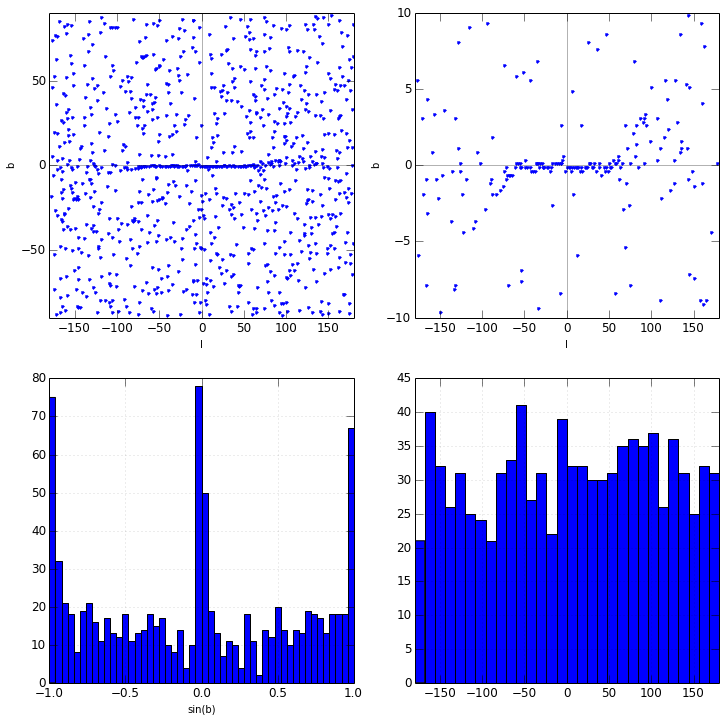

In [4]:
fig, axx = plt.subplots(2,2, figsize=(12,12))
ax = axx[0,0]
ax.plot(t.l, t.b, '.')
plt.setp(ax, xlabel='l', ylabel='b', xlim=(-180,180), ylim=(-90,90))
ax.axhline(0, color='k', alpha=0.3)
ax.axvline(0, color='k', alpha=0.3)
ax = axx[1,0]
sinb = np.sin(np.radians(t.b))
dom = np.linspace(-1,1,51)
ax.hist(list(sinb),dom);
plt.setp(ax, xlabel='sin(b)')
ax.grid(True, alpha=0.3)
ax = axx[0,1]
ax.plot(t.l, t.b, '.')
plt.setp(ax, xlabel='l', ylabel='b', xlim=(-180,180), ylim=(-10,10))
ax.axhline(0, color='k', alpha=0.3)
ax.axvline(0, color='k', alpha=0.3)
ax= axx[1,1]
ax.hist(list(t.l), np.linspace(-180, 180,31));
plt.setp(ax, xlim=(-180,180))
ax.grid(True, alpha=0.3)

Save in my seed format

In [5]:
t['name'] = ['PW%02d-%04d' %(month,i) for i in t.index]
pg= t['ra dec'.split()]
pg.index=t['name']
pg

,ra,dec
name,,
PW10-0001,12.152055,-25.907530
PW10-0002,12.327206,-28.683815
PW10-0003,15.013848,-26.228742
PW10-0004,10.991022,-26.273705
PW10-0005,11.574862,-28.925663
PW10-0006,13.703849,-29.383787
PW10-0007,13.741244,-24.889469
PW10-0008,10.401227,-28.075024
PW10-0009,16.122378,-28.321192


In [6]:
pg.to_csv(open('seeds_pgw.csv','w') )